# TP Modulation - Transmission en bande de base sur un canal à bande limitée
vincent.mazet@unistra.fr, 04/2021

Dans ce notebook, on compare la forme d'onde rectangulaire avec une forme d'onde en racine de cosinus surélevé.

In [1]:
import numpy as np
import comnumfip as cnf
import matplotlib.pyplot as plt

On génère une séquence binaire qui sera utilisé pour les deux types de modulations.

In [2]:
# Amplitude et durée de la forme d'onde
V, T = 2, 1

# Paramètres de simulation
L = 100        # Nombre de points par bit
fe = L/T       # "fréquence d'échantillonnage"

# Séquence binaire aléatoire
N = 256
c = cnf.randmary(N,[.5, .5])
print(f"Séquence binaire : {c[:16]}\b ...]")

# Canal à bande limitée
fc = 1/T * .7
sig = 0

Séquence binaire : [1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 ...]


In [3]:
# Filtre de transmission (rectangle)
t, xr = cnf.mod_d(c, V, T)

# Canal
yr = cnf.channel(xr, fc, sig, T)

# Filtre de réception
_, g = cnf.mod_d([1], 1, T)
g = g/np.sum(g)
zr = np.convolve(yr, g, "same")

In [4]:
# Filtre de transmission (racine de cosinus surélevé)
a = 0.5
t, xc = cnf.mod_rrc(c, V, T, a)

# Canal
yc = cnf.channel(xc, fc, sig, T)

# Filtre de réception :
# On génère une séquence nulle avec un unique bit à 1,
# puis on récupère uniquement la partie centrale de ce signal
Ng = 10
mg = np.zeros(Ng*2+1)
mg[Ng] = 1
_, g = cnf.mod_rrc(mg, 1, T, a)
g = g[ int(Ng*L/2) : int(Ng*L*1.5+L) ]
g = g + 1
g = g/np.sum(g)
zc = np.convolve(yc, g, "same")

La séquence binaire est modulée en NRZ avec une forme d'onde rectangulaire (en bleu) et en racine de cosinus surélevé (en orange).

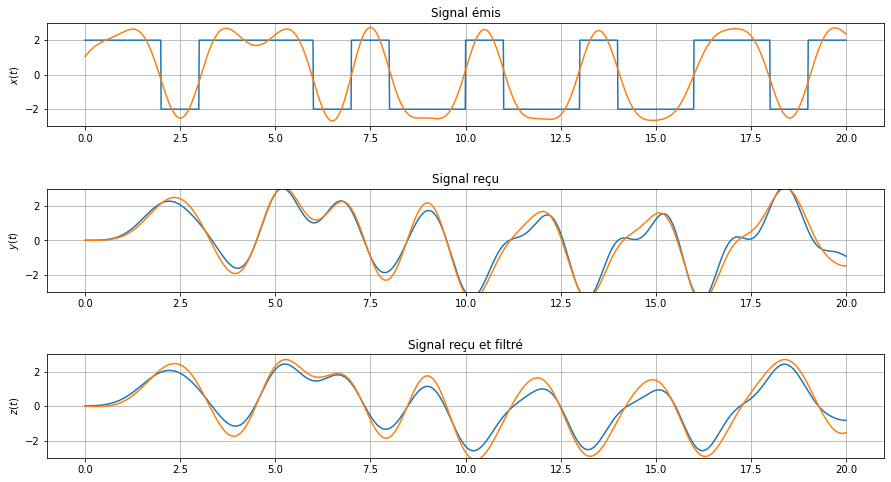

In [5]:
nn = range(20*L)
signals = [
    (xr, xc, "$x(t)$", "Signal émis"),
    (yr, yc, "$y(t)$", "Signal reçu"),
    (zr, zc, "$z(t)$", "Signal reçu et filtré")
]

fig, axs = plt.subplots(3,1,figsize=(15,8))
plt.subplots_adjust(hspace=0.6)
for i in range(len(signals)):
    sr = signals[i][0]
    sc = signals[i][1]
    ylabel = signals[i][2]
    title = signals[i][3]
    axs[i].plot(t[nn], sr[nn])
    axs[i].plot(t[nn], sc[nn])
    axs[i].set_ylabel(ylabel)
    axs[i].set_ylim([-3, 3])
    axs[i].set_title(title)
    axs[i].grid()
plt.show()

On peut observer les diagrammes de l'œil de ces signaux : on peut voir que la modulation en racine de cosinus surélevé permet systématiquement d'avoir un œil plus ouvert qu'avec une forme d'onde rectangulaire.

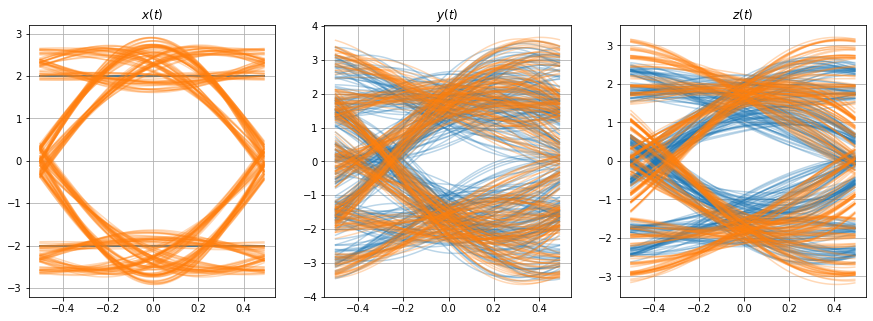

In [6]:
def myeyediag(t, sr, dr, sc, dc, title=""):
    
    # Échantillons à représenter (en éliminant les premiers, et en incluant un décalage pour centrer le diagramme de l'œil)
    nt = range(2*L,(N-1)*L)
    nr = range(2*L+dr,(N-1)*L+dr)
    nc = range(2*L+dc,(N-1)*L+dc)
    
    cnf.eyediag(t[nt], sr[nr], T, alpha=0.3, color="tab:blue")
    cnf.eyediag(t[nt], sc[nc], T, alpha=0.3, color="tab:orange")
    plt.grid()
    plt.title(title)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
myeyediag(t, xr, 0, xc, 0, title="$x(t)$")

plt.subplot(1, 3, 2)
myeyediag(t, yr, 25, yc, 25, title="$y(t)$")

plt.subplot(1, 3, 3)
myeyediag(t, zr, 35, zc, 30, title="$z(t)$")

plt.show()